# **Statistical Analysis for Possums** 

**In this notebook, we will be using statistical tools such as Measure of Center and Measure of spread to analyse the dataset on Possums**

- Check the gender of the possums in the dataset
- Calculate the mean/median/mode of each possum gender
- Check the location each gender was trapped
- Check the population of the possums

In [91]:
# Importing all libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub 



# **Preliminary Data Analysis**

In [92]:
# Loading our dataset
from pathlib import Path 
path = kagglehub.dataset_download("abrambeyer/openintro-possum")
possum = Path('possum.csv')
path_full = path / possum
print("Path to dataset files:", path)
data = pd.read_csv(path_full)
data.head()

Path to dataset files: C:\Users\Noimot\.cache\kagglehub\datasets\abrambeyer\openintro-possum\versions\1


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [93]:
# Checking the data type for the columns
data.dtypes

case          int64
site          int64
Pop          object
sex          object
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

In [94]:
# Checking the size of the datasets
data.shape

(104, 14)

# **Data Cleaning**

In [95]:
# Checking the data for missing values
data.isna().sum()


case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [96]:
# Removing the columns with missing values
data2 = data.dropna()


In [97]:
# Checking for duplicate data
data.duplicated().sum
data2

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [98]:
# Setting the index of the dataset using column "case"
data2.set_index("case", inplace=True)
data2.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [99]:
# Checking the genders in the dataset
gender_type = data2['sex'].unique()
no_of_gender = data2['sex'].nunique()
print(f"The dataset consists of {no_of_gender} types of gender; {gender_type}")


The dataset consists of 2 types of gender; ['m' 'f']


In [100]:
# Checking the total number of the possum gender in the dataset
total_possums = data2['sex'].value_counts()
print(f"The total number of possums by sex:\n{total_possums}")

The total number of possums by sex:
sex
m    59
f    42
Name: count, dtype: int64


In [101]:
# Checking the site the possums were trapped
trapped_site_possums = data2['site'].value_counts(ascending=True)
print(f"The possums were trapped in the seven sites listed below:\n{trapped_site_possums}")

The possums were trapped in the seven sites listed below:
site
4     7
3     7
2    10
5    13
6    13
7    18
1    33
Name: count, dtype: int64


In [102]:
# Checking the population of the possums
pop_possums = data2['Pop'].value_counts(ascending=True)
print(f"The trapped possums were found in two regions {pop_possums}")

The trapped possums were found in two regions Pop
Vic      43
other    58
Name: count, dtype: int64


# **Descriptive Data Analysis**

In [103]:
# Checking the statistical analysis
data2.describe(include='all')

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,101.000000,101,101,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
unique,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,other,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,58,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.673267,NaN,NaN,3.821782,92.730693,56.960396,87.269307,37.049505,68.398020,48.133663,15.050495,27.064356,32.638614
std,2.366892,NaN,NaN,1.915182,3.518714,3.102679,4.196802,1.971681,4.413502,4.060352,1.058643,2.020722,2.727745
min,1.000000,NaN,NaN,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,41.300000,12.800000,22.000000,25.000000
25%,1.000000,NaN,NaN,2.000000,90.700000,55.000000,84.500000,36.000000,64.500000,44.800000,14.400000,25.500000,31.000000
50%,4.000000,NaN,NaN,3.000000,92.900000,56.400000,88.000000,37.000000,67.900000,46.800000,14.900000,27.000000,32.500000
75%,6.000000,NaN,NaN,5.000000,94.800000,58.100000,90.000000,38.000000,72.500000,52.000000,15.700000,28.000000,34.000000


In [104]:
# Let's print the female possums in the dataset
get_female = data2[data2['sex'] == 'f']
get_female.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0


**Using Measure of center to calculate the mean, median and mode**

In [105]:
# Calculating the total number of female possums 
total_female_possums = get_female.value_counts().sum()
print(f"The total number of female possums is {total_female_possums}")

The total number of female possums is 42


In [106]:
# Calculating the average age for the female possums using mean
female_possums_mean = get_female['age']
print(f"The average age for the female possum is {np.mean(female_possums_mean)}")


The average age for the female possum is 3.9523809523809526


In [107]:
# Calculating the median for the female possums
female_possums_median = get_female['age']
print(f"The median value for the age of a female possum is {np.median(female_possums_median)}")

The median value for the age of a female possum is 3.5


In [108]:
# Calculate the most frequent age in the dataset for female possums
possums_mode = get_female['age'].mode()
print(f"The most frequent age of female possums is:{possums_mode}")

The most frequent age of female possums is:0    3.0
Name: age, dtype: float64


In [109]:
# Let's print the male possums in the dataset
get_male = data2[data2['sex'] == 'm']
get_male.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
13,1,Vic,m,5.0,95.1,59.9,89.5,36.0,71.0,49.8,15.8,27.0,32.0
14,1,Vic,m,3.0,95.4,57.6,91.5,36.0,74.3,53.7,15.1,28.0,31.5
15,1,Vic,m,5.0,92.9,57.6,85.5,34.0,69.7,51.8,15.7,28.0,35.0


In [110]:
# Calculating the total number of female possums 
total_male_possums = get_male.value_counts().sum()
print(f"The total number of male possums is {total_male_possums}")


The total number of male possums is 59


In [111]:
# Calculating the average age for the male possums using mean
male_possums_mean = get_male['age']
print(f"The average age for the male possum is {np.mean(male_possums_mean)}")

The average age for the male possum is 3.7288135593220337


In [112]:
# Calculating the median for the female possums
male_possums_median = get_male['age']
print(f"The median value for the age of a male possum is {np.median(male_possums_median)}")

The median value for the age of a male possum is 3.0


In [113]:
# Calculate the most frequent age in the dataset for male and female possums
possums_mode = get_male['age'].mode()
print(f"The most frequent age of the male possums:{possums_mode}")

The most frequent age of the male possums:0    3.0
Name: age, dtype: float64


`Data Visualization for the male & female possums`

In [114]:
# Grouping the value of the male vs the female possums
total_sex = data2.groupby('sex')['sex'].value_counts(ascending=True)
total_sex

sex
f    42
m    59
Name: count, dtype: int64

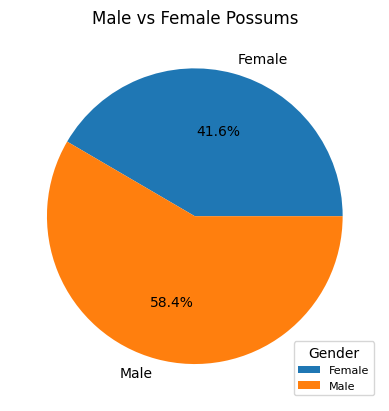

In [115]:
# Plotting the chart for the total gender using pie chart in pandas

labels = ['Female', 'Male']
plt.pie(total_sex, labels=labels, autopct='%1.1f%%')
plt.legend(title='Gender', loc='lower right', fontsize=8)
plt.title('Male vs Female Possums')
plt.show()


**Findings using gender**

- The female possums make up 41.6% (42 out of 104 possums) in the dataset.
- The male make up 58.4% (59 out of 104 possums)in the dataset. 

`Data Visualization for the Sexes(male & female) by age`

In [116]:
# Getting the value of the sex by age for the female possums
total_female = get_female.groupby('sex')['age'].value_counts(ascending=True)
total_female

sex  age
f    7.0     1
     9.0     2
     1.0     3
     5.0     5
     4.0     6
     2.0     7
     6.0     7
     3.0    11
Name: count, dtype: int64

<Axes: title={'center': 'Female Possums by age'}, xlabel='sex,age', ylabel='frequency'>

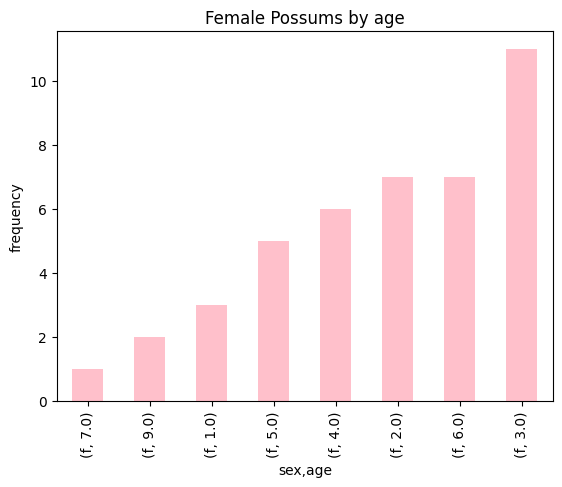

In [117]:
# Data visualization of the total female possums by age
total_female.plot(kind='bar', ylabel='frequency', title='Female Possums by age', color='pink')

In [118]:
# Getting the value of the sex by age for the male possums
total_male = get_male.groupby('sex')['age'].value_counts(ascending=True)
total_male

sex  age
m    8.0     1
     6.0     5
     7.0     6
     1.0     7
     5.0     7
     4.0     8
     2.0     9
     3.0    16
Name: count, dtype: int64

<Axes: title={'center': 'Male Possums by age'}, xlabel='sex,age', ylabel='frequency'>

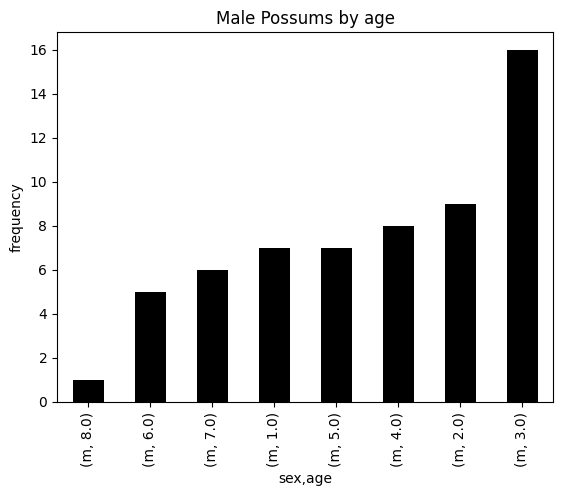

In [119]:
# Data visualization of the total male possums by age
total_male.plot(kind='bar', ylabel='frequency', title='Male Possums by age', color='black')

**Findings using the sexes vs age**
- There are 11 female possums and 16 male possums, aged 3.
- The oldest male possum is 8 years old and the oldest female possums are aged 9.
- The possums without age have been removed as they do not alter our dataset.


`Data Visualization of the possums trapped site by gender`

In [120]:
# Grouping the female possums by the trapped sites they were found
total_trapped_female = get_female.groupby('site')['sex'].value_counts(ascending=True)
total_trapped_female

site  sex
1     f      19
2     f       4
3     f       3
4     f       2
5     f       6
6     f       4
7     f       4
Name: count, dtype: int64

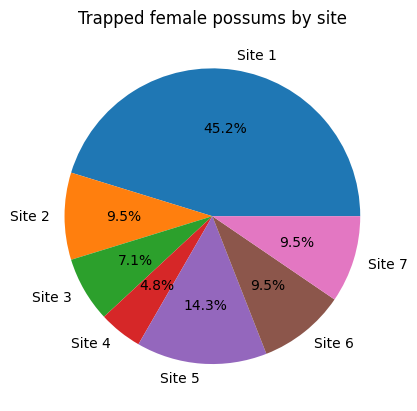

In [121]:
# Data visualization of the total female possums by the site they were trapped
labels = ['Site 1', 'Site 2', 'Site 3', 'Site 4', 'Site 5', 'Site 6', 'Site 7']
plt.pie(total_trapped_female, labels=labels, autopct='%1.1f%%')
plt.title('Trapped female possums by site')
plt.show()


In [122]:
# Grouping the male possums by the trapped sites they were found
total_trapped_male = get_male.groupby('site')['sex'].value_counts(ascending=True)
total_trapped_male

site  sex
1     m      14
2     m       6
3     m       4
4     m       5
5     m       7
6     m       9
7     m      14
Name: count, dtype: int64

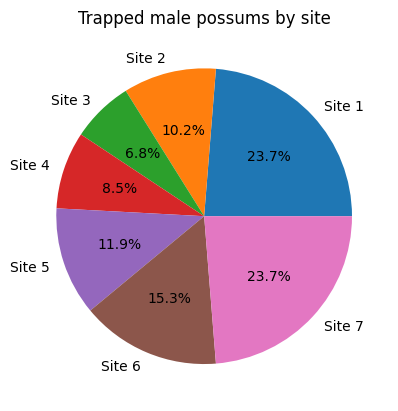

In [123]:
# Data visualization of the total male possums by the site they were trapped
labels = ['Site 1', 'Site 2', 'Site 3', 'Site 4', 'Site 5', 'Site 6', 'Site 7']
plt.pie(total_trapped_male, labels=labels, autopct='%1.1f%%')
plt.title('Trapped male possums by site')
plt.show()


**Findings using the gender vs the trapped locations**
- 14 male possums (23.7% of the total male) were found in site 1.
- 14 male possums (23.7% of the total male) were found in site 7.
- 19 female possums (45.2% of the total female) were found in site 1.
- Site 4 had the least number of trapped female possums (4.8% of the total female).
- Site 3 had the least number of trapped male possums (6.8% of the total male).


**Calculating the measure of Center using the features of the possum by gender**

In [124]:
# Calculating the mean of each features of a female possum
female_features_mean = get_female.mean(axis=0, numeric_only=True)
female_features_mean
print(f"The average length of the female possum head is: {female_features_mean['hdlngth']}")
print(f"The average width of the female possum skull is: {female_features_mean['skullw']}")
print(f"The average height of the female possum is: {female_features_mean['totlngth']}")
print(f"The average length of the female possum tail is: {female_features_mean['taill']}")
print(f"The average length of the female possum foot is: {female_features_mean['footlgth']}")
print(f"The average length of the female possum ear conch is: {female_features_mean['earconch']}")
print(f"The average size of the female possum eye is: {female_features_mean['eye']}")
print(f"The average length of the female possum chest is: {female_features_mean['chest']}")
print(f"The average length of the female possum belly is: {female_features_mean['belly']}")

The average length of the female possum head is: 92.23809523809524
The average width of the female possum skull is: 56.57857142857142
The average height of the female possum is: 88.02380952380952
The average length of the female possum tail is: 37.11904761904762
The average length of the female possum foot is: 69.11190476190475
The average length of the female possum ear conch is: 48.773809523809526
The average size of the female possum eye is: 14.785714285714286
The average length of the female possum chest is: 27.345238095238095
The average length of the female possum belly is: 32.94047619047619


In [125]:
# Calculating the median of each features of a female possum
female_features_median = get_female.median(axis=0, numeric_only=True)   
print(f"The median of the female possum head is: {female_features_median['hdlngth']}")
print(f"The median of the female possum skull width is: {female_features_median['skullw']}")
print(f"The median height of the female possum is: {female_features_median['totlngth']}")
print(f"The median length of the female possum tail is: {female_features_median['taill']}")
print(f"The median length of the female possum foot is: {female_features_median['footlgth']}")
print(f"The median length of the female possum ear conch is: {female_features_median['earconch']}")
print(f"The median size of the female possum eye is: {female_features_median['eye']}")
print(f"The median length of the female possum chest is: {female_features_median['chest']}")
print(f"The median length of the female possum belly is: {female_features_median['belly']}")

The median of the female possum head is: 92.5
The median of the female possum skull width is: 56.349999999999994
The median height of the female possum is: 88.75
The median length of the female possum tail is: 37.75
The median length of the female possum foot is: 70.44999999999999
The median length of the female possum ear conch is: 50.8
The median size of the female possum eye is: 14.75
The median length of the female possum chest is: 28.0
The median length of the female possum belly is: 33.0


In [126]:
# Calculating the mode of each feature of a female possum
female_features_mode = get_female.mode().iloc[0]
print(f"The mode of the female possum head is: {female_features_mode['hdlngth']}")
print(f"The mode of the female possum skull width is: {female_features_mode['skullw']}")
print(f"The mode height of the female possum is: {female_features_mode['totlngth']}")
print(f"The mode length of the female possum tail is: {female_features_mode['taill']}")
print(f"The mode length of the female possum foot is: {female_features_mode['footlgth']}")
print(f"The mode length of the female possum ear conch is: {female_features_mode['earconch']}")
print(f"The mode size of the female possum eye is: {female_features_mode['eye']}")
print(f"The mode length of the female possum chest is: {female_features_mode['chest']}")
print(f"The mode length of the female possum belly is: {female_features_mode['belly']}")

The mode of the female possum head is: 90.0
The mode of the female possum skull width is: 56.3
The mode height of the female possum is: 89.0
The mode length of the female possum tail is: 38.0
The mode length of the female possum foot is: 72.8
The mode length of the female possum ear conch is: 46.0
The mode size of the female possum eye is: 14.0
The mode length of the female possum chest is: 28.0
The mode length of the female possum belly is: 34.0


In [127]:
# Calculating the mean of each features of a male possum
male_features_mean = get_male.mean(axis=0, numeric_only=True)
print(f"The average length of the male possum head is: {male_features_mean['hdlngth']}")
print(f"The average width of the male possum skull is: {male_features_mean['skullw']}")
print(f"The average height of the male possum is: {male_features_mean['totlngth']}")
print(f"The average length of the male possum tail is: {male_features_mean['taill']}")
print(f"The average length of the male possum foot is: {male_features_mean['footlgth']}")
print(f"The average length of the male possum ear conch is: {male_features_mean['earconch']}")
print(f"The average size of the male possum eye is: {male_features_mean['eye']}")
print(f"The average length of the male possum chest is: {male_features_mean['chest']}")
print(f"The average length of the male possum belly is: {male_features_mean['belly']}")

The average length of the male possum head is: 93.0813559322034
The average width of the male possum skull is: 57.2322033898305
The average height of the male possum is: 86.7322033898305
The average length of the male possum tail is: 37.0
The average length of the male possum foot is: 67.88983050847457
The average length of the male possum ear conch is: 47.67796610169491
The average size of the male possum eye is: 15.238983050847455
The average length of the male possum chest is: 26.864406779661017
The average length of the male possum belly is: 32.42372881355932


In [128]:
# Calculating the median of each features of a male possum
male_features_median = get_male.median(axis=0, numeric_only=True)   
print(f"The median of the male possum head is: {male_features_median['hdlngth']}")
print(f"The median of the male possum skull width is: {male_features_median['skullw']}")
print(f"The median height of the male possum is: {male_features_median['totlngth']}")
print(f"The median length of the male possum tail is: {male_features_median['taill']}")
print(f"The median length of the male possum foot is: {male_features_median['footlgth']}")
print(f"The median length of the male possum ear conch is: {male_features_median['earconch']}")
print(f"The median size of the male possum eye is: {male_features_median['eye']}")
print(f"The median length of the male possum chest is: {male_features_median['chest']}")
print(f"The median length of the male possum belly is: {male_features_median['belly']}")

The median of the male possum head is: 93.3
The median of the male possum skull width is: 56.6
The median height of the male possum is: 86.0
The median length of the male possum tail is: 36.5
The median length of the male possum foot is: 66.5
The median length of the male possum ear conch is: 46.2
The median size of the male possum eye is: 15.0
The median length of the male possum chest is: 27.0
The median length of the male possum belly is: 32.0


In [129]:
# Calculating the mode of each feature of a male possum
male_features_mode = get_male.mode().iloc[0]
print(f"The mode of the male possum head is: {male_features_mode['hdlngth']}")
print(f"The mode of the male possum skull width is: {male_features_mode['skullw']}")
print(f"The mode height of the male possum is: {male_features_mode['totlngth']}")
print(f"The mode length of the male possum tail is: {male_features_mode['taill']}")
print(f"The mode length of the male possum foot is: {male_features_mode['footlgth']}")
print(f"The mode length of the male possum ear conch is: {male_features_mode['earconch']}")
print(f"The mode size of the male possum eye is: {male_features_mode['eye']}")
print(f"The mode length of the male possum chest is: {male_features_mode['chest']}")
print(f"The mode length of the male possum belly is: {male_features_mode['belly']}")

The mode of the male possum head is: 89.5
The mode of the male possum skull width is: 56.0
The mode height of the male possum is: 85.0
The mode length of the male possum tail is: 38.0
The mode length of the male possum foot is: 65.6
The mode length of the male possum ear conch is: 44.9
The mode size of the male possum eye is: 15.0
The mode length of the male possum chest is: 27.0
The mode length of the male possum belly is: 32.0


`Data Visualization for the Total Length of the Possums`

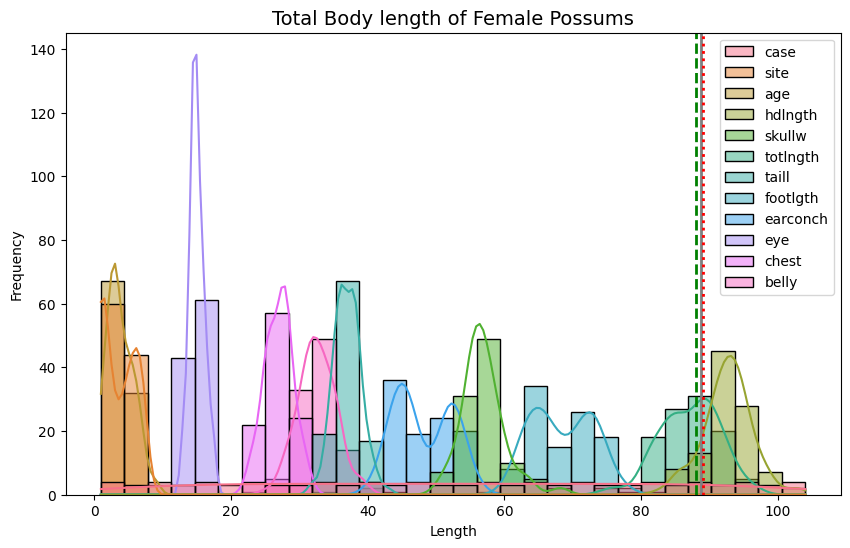

In [130]:
# Plotting the total body length of the female possums

# Plot histogram with KDE
plt.figure(figsize=(10,6))
sns.histplot(data, bins=30, kde=True, color="purple")

# Add vertical lines
plt.axvline(female_features_mean['totlngth'], color='green', linestyle='--', linewidth=2, label=f'Mean = {female_features_mean}')
plt.axvline(female_features_median['totlngth'], color='grey', linestyle='-', linewidth=2, label=f'Median = {female_features_median}')
plt.axvline(female_features_mode['totlngth'], color='red', linestyle=':', linewidth=2, label=f'Mode = {female_features_mode}')

# Add title
plt.title(f"Total Body length of Female Possums", fontsize=14)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

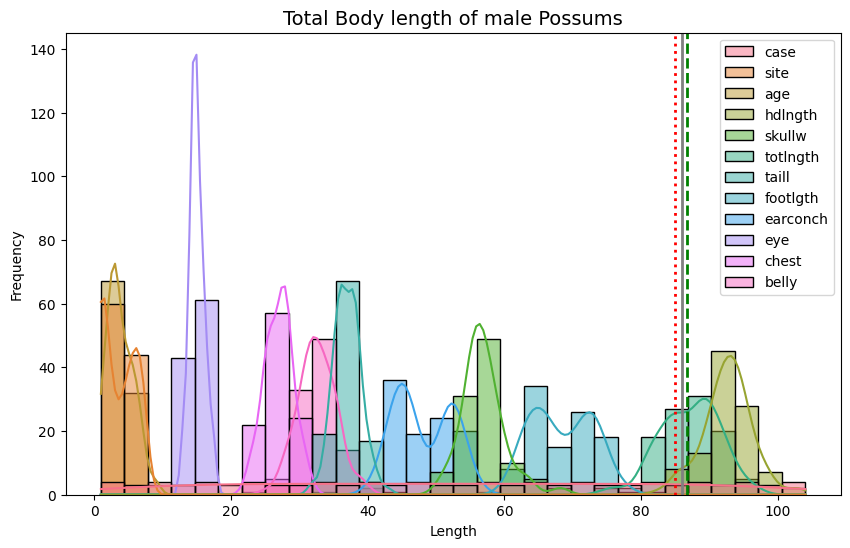

In [131]:
# Plotting the total body length of the male possums

# Plot histogram with KDE
plt.figure(figsize=(10,6))
sns.histplot(data, bins=30, kde=True, color="purple")

# Add vertical lines
plt.axvline(male_features_mean['totlngth'], color='green', linestyle='--', linewidth=2, label=f'Mean = {male_features_mean}')
plt.axvline(male_features_median['totlngth'], color='grey', linestyle='-', linewidth=2, label=f'Median = {male_features_median}')
plt.axvline(male_features_mode['totlngth'], color='red', linestyle=':', linewidth=2, label=f'Mode = {male_features_mode}')

# Add title 
plt.title(f"Total Body length of male Possums", fontsize=14)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

In [132]:
# Calculating the mean of all the features of a possum(male & female)
all_possum_features_mean = data2.mean(axis=0, numeric_only=True)
all_possum_features_mean

site         3.673267
age          3.821782
hdlngth     92.730693
skullw      56.960396
totlngth    87.269307
taill       37.049505
footlgth    68.398020
earconch    48.133663
eye         15.050495
chest       27.064356
belly       32.638614
dtype: float64

In [133]:
# Calculating the median of all the features of a possum(male & female)
all_possum_features_median = data2.median(axis=0, numeric_only=True)
all_possum_features_median

site         4.0
age          3.0
hdlngth     92.9
skullw      56.4
totlngth    88.0
taill       37.0
footlgth    67.9
earconch    46.8
eye         14.9
chest       27.0
belly       32.5
dtype: float64

In [134]:
# Calculating the mode of all the features of a possum(male & female)
all_possum_features_mode = data2.mode().iloc[0]
all_possum_features_mode

site          1.0
Pop         other
sex             m
age           3.0
hdlngth      93.3
skullw       57.6
totlngth     89.0
taill        38.0
footlgth     73.2
earconch     44.9
eye          14.5
chest        28.0
belly        32.0
Name: 0, dtype: object

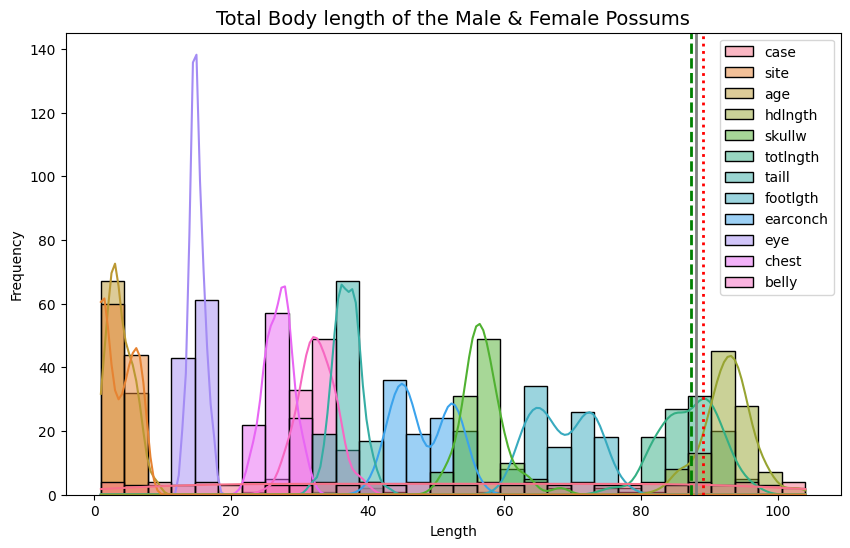

In [135]:
# Plotting the total body length of the male and female possums

# Plot histogram with KDE
plt.figure(figsize=(10,6))
sns.histplot(data, bins=30, kde=True, color="purple")

# Add vertical lines
plt.axvline(all_possum_features_mean['totlngth'], color='green', linestyle='--', linewidth=2, label=f'Mean = {all_possum_features_mean}')
plt.axvline(all_possum_features_median['totlngth'], color='grey', linestyle='-', linewidth=2, label=f'Median = {all_possum_features_median}')
plt.axvline(all_possum_features_mode['totlngth'], color='red', linestyle=':', linewidth=2, label=f'Mode = {all_possum_features_mode}')

# Add title 
plt.title(f"Total Body length of the Male & Female Possums", fontsize=14)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()


# **Measure of Spread**

**Findings using Range for the Age**
- Using range gives a quick sense of the spread but cannot be used t determine the distribution of the dataset.

In [136]:
# Calculating the variance of the female possums 
female_var = get_female['age'].var()
female_var

np.float64(3.851335656213705)

In [137]:
# Calculating the youngest female possums in the dataset
min_age_female = get_female['age'].min()
min_age_female

np.float64(1.0)

In [138]:
# Calculating the oldest female possums in the dataset
max_age_female = get_female['age'].max()
max_age_female

np.float64(9.0)

In [139]:
# Calculating the age range of the female possums
age_range_female = max_age_female - min_age_female
print(f"The age range of the female possums in the dataset is {age_range_female}")

The age range of the female possums in the dataset is 8.0


In [140]:
# Calculating the youngest male possums in the dataset
min_age_male = get_male['age'].min()
min_age_male

np.float64(1.0)

In [141]:
# Calculating the oldest male possums in the dataset
max_age_male = get_male['age'].max()
max_age_male

np.float64(8.0)

In [142]:
# Calculating the age range of the female possums
age_range_male = max_age_male - min_age_male
print(f"The age range of the female possums in the dataset is {age_range_male}")

The age range of the female possums in the dataset is 7.0


In [143]:
# Calculating the total young male & female possums
min_age = data2['age'].min()
min_age

np.float64(1.0)

In [144]:
# Calculating the total old male & female possums
max_age = data2['age'].max()
max_age

np.float64(9.0)

In [145]:
# Calculating the total age range of the male & female possums
total_age_range = max_age- min_age
print(f"The total age range of the male & female possums in the dataset is {total_age_range}")

The total age range of the male & female possums in the dataset is 8.0


**Findings using Range for the total length of the possums**

In [146]:
# Calculating the min total body length of female possums in the dataset
min_totlnght_female = get_female['totlngth'].min()
min_totlnght_female

np.float64(75.0)

In [147]:
# Calculating the max total body length of female possums in the dataset
max_totlnght_female = get_female['totlngth'].max()
max_totlnght_female

np.float64(96.5)

In [148]:
# Calculating the range of the female total length
totlngth_range_female = max_totlnght_female - min_totlnght_female
print(f"The total body length range of the female possums in the dataset is {totlngth_range_female}")

The total body length range of the female possums in the dataset is 21.5


In [149]:
# Calculating the min total body length of male possums in the dataset
min_totlnght_male = get_male['totlngth'].min()
min_totlnght_male

np.float64(77.0)

In [150]:
# Calculating the max total body length of male possums in the dataset
max_totlnght_male = get_male['totlngth'].max()
max_totlnght_male

np.float64(96.0)

In [151]:
# Calculating the range of the male total length
totlngth_range_male = max_totlnght_male - min_totlnght_male
print(f"The range of the total body length of the male possums in the dataset is {totlngth_range_male}")

The range of the total body length of the male possums in the dataset is 19.0


In [152]:
# Calculating the min total body length of male and female possums
min_totlnght = data2['totlngth'].min()
min_totlnght

np.float64(75.0)

In [153]:
# Calculating the max total body length of male and female possums
max_totlnght = data2['totlngth'].max()
max_totlnght

np.float64(96.5)

In [154]:
# Calculating the range of the total body length (male&female)
totlngth_range = max_totlnght - min_totlnght
print(f"The range of the total body length of the male and female possums in the dataset is {totlngth_range_male}")

The range of the total body length of the male and female possums in the dataset is 19.0


In [155]:
# Checking the statistical summary 
data2.describe()

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,3.673267,3.821782,92.730693,56.960396,87.269307,37.049505,68.398020,48.133663,15.050495,27.064356,32.638614
std,2.366892,1.915182,3.518714,3.102679,4.196802,1.971681,4.413502,4.060352,1.058643,2.020722,2.727745
min,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,41.300000,12.800000,22.000000,25.000000
25%,1.000000,2.000000,90.700000,55.000000,84.500000,36.000000,64.500000,44.800000,14.400000,25.500000,31.000000
50%,4.000000,3.000000,92.900000,56.400000,88.000000,37.000000,67.900000,46.800000,14.900000,27.000000,32.500000
75%,6.000000,5.000000,94.800000,58.100000,90.000000,38.000000,72.500000,52.000000,15.700000,28.000000,34.000000
max,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [156]:
# Finding the variance of the features of the possums
features_var = data2.var(axis=0, numeric_only=True)
print(f"The variance of the features of all male and female possums\n{features_var}")


The variance of the features of all male and female possums
site         5.602178
age          3.667921
hdlngth     12.381349
skullw       9.626616
totlngth    17.613149
taill        3.887525
footlgth    19.478996
earconch    16.486455
eye          1.120725
chest        4.083317
belly        7.440594
dtype: float64


In [157]:
# Finding the standard deviation of the total length of the possums
features_std = data2.std(axis=0, numeric_only=True)
print(f"The standard deviation of the features of all male and female possums\n{features_std}")


The standard deviation of the features of all male and female possums
site        2.366892
age         1.915182
hdlngth     3.518714
skullw      3.102679
totlngth    4.196802
taill       1.971681
footlgth    4.413502
earconch    4.060352
eye         1.058643
chest       2.020722
belly       2.727745
dtype: float64


In [158]:
# Finding the percentile of the total body length of the possums
percentile = data2['totlngth'].quantile([0.25, 0.5, 0.75, 1.0])
print(f"Percentiles:\n{list(percentile)}")

Percentiles:
[84.5, 88.0, 90.0, 96.5]


In [159]:
# Finding the quartile of the total body length of the possums
iqr = list(percentile)[2] - list(percentile)[0]
print(f"Interquartile Range(IQR):\n{iqr}")

Interquartile Range(IQR):
5.5


In [160]:
# Finding the skewness of the total body length of the possums
skewness = data2['totlngth'].skew()
print(f"The value of the skewness: {skewness}")
# Interpretation
if skewness < 0:
    print("The distribution is negatively skewed (tail to the left i.e the mean of the total length of the possums is lesser than the median).")
elif skewness > 0:
    print("The distribution is positively skewed (tail to the right i.e the mean of the total length of the possums is greater than the median).")
else:
    print("The distribution is symmetric (scores are evenly spread around the mean).")


The value of the skewness: -0.2488556532210192
The distribution is negatively skewed (tail to the left i.e the mean of the total length of the possums is lesser than the median).


In [161]:
# Relative spread of the total body length (Coefficient of Variation)

cv = features_std['totlngth'] / all_possum_features_mean['totlngth']   # ratio
cv_percent = cv * 100             # percentage

print("Coefficient of Variation (CV):", cv)
print("Relative Spread (% of mean):", round(cv_percent), "%")

Coefficient of Variation (CV): 0.04809024300569761
Relative Spread (% of mean): 5 %


**Interpretation (Co-eff of variation)**

- This means the standard deviation is 5% of the mean, i.e. the total body length deviate from the average by 5% of the mean.

**What this implies about the spread**

In the dataset of 104 possums, the total body length vary significantly from the the mean. On average, the possums total body length deviate from the average of the dataset by 1/20th of the mean value.

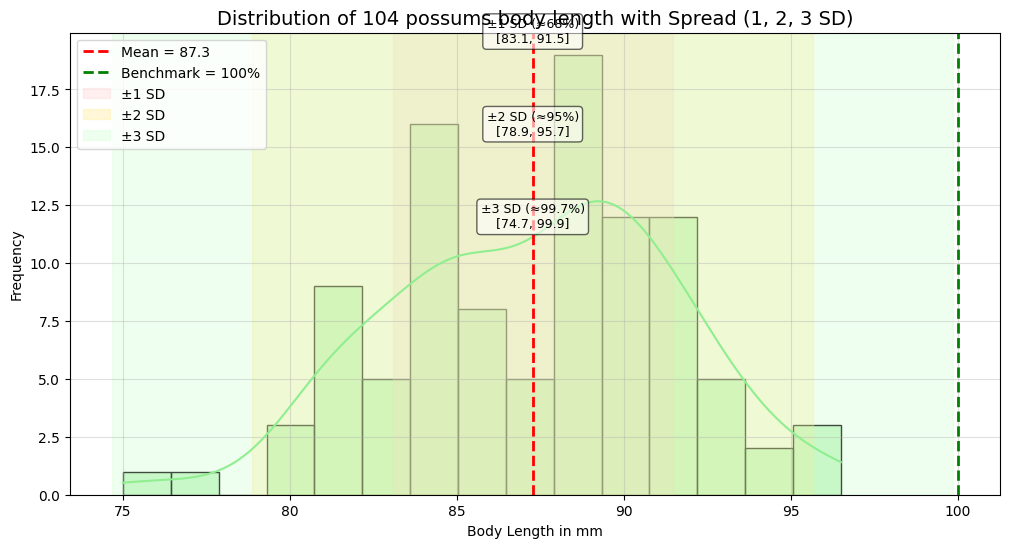

In [162]:
# Plot histogram
plt.figure(figsize=(12,6))
sns.histplot(data2['totlngth'], bins=15, kde=True, color="lightgreen", edgecolor="black")

# Add mean line
plt.axvline(all_possum_features_mean['totlngth'], color="red", linestyle="--", linewidth=2, label=f"Mean = {all_possum_features_mean['totlngth']:.1f}")

# Add benchmark line (100%)
plt.axvline(100, color="green", linestyle="--", linewidth=2, label="Benchmark = 100%")

# Define SD ranges with expected percentages
sd_info = [
    (1, "#ffcccc", "±1 SD", "≈68%"),
    (2, "#ffe680", "±2 SD", "≈95%"),
    (3, "#ccffcc", "±3 SD", "≈99.7%")
]

# Shade & annotate SD ranges
for k, color, label, pct, ypos in zip(
    [1,2,3], 
    ["#ffcccc", "#ffe680", "#ccffcc"], 
    ["±1 SD", "±2 SD", "±3 SD"],
    ["≈68%", "≈95%", "≈99.7%"],
    [20, 16, 12]   # adjust annotation height
):
    min_val = all_possum_features_mean['totlngth'] - k* features_std['totlngth']
    max_val = min(all_possum_features_mean['totlngth'] + k* features_std['totlngth'], 100)
    plt.axvspan(min_val, max_val, color=color, alpha=0.3, label=label)

    # Add text label
    plt.text((min_val+max_val)/2, ypos, 
             f"{label} ({pct})\n[{min_val:.1f}, {max_val:.1f}]", 
             ha="center", va="center", fontsize=9, 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.6))

# Labels and title
plt.title("Distribution of 104 possums body length with Spread (1, 2, 3 SD)", fontsize=14)
plt.xlabel("Body Length in mm")
plt.ylabel("Frequency")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

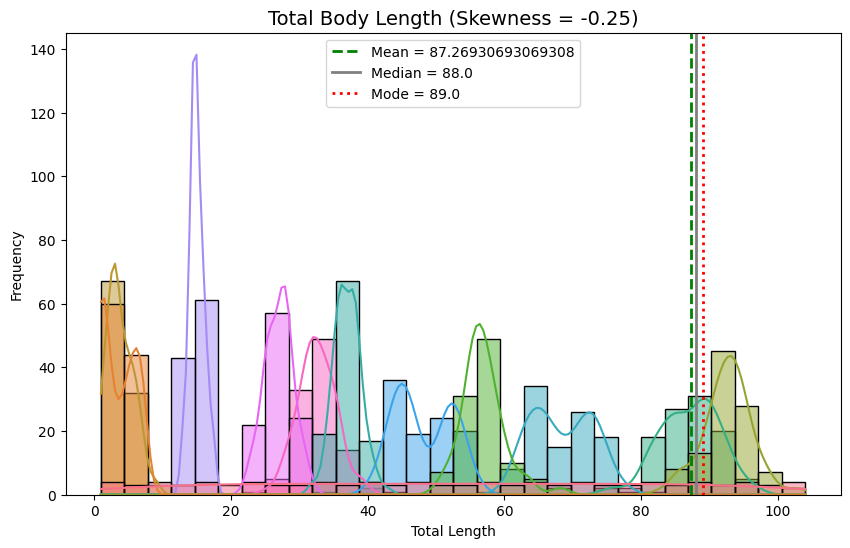

In [163]:
# Plotting Total body length of the possums and checking the skewness
all_possum_features_mean['totlngth']
all_possum_features_median['totlngth']
all_possum_features_mode['totlngth']
skewness

# Plot histogram with KDE
plt.figure(figsize=(10,6))
sns.histplot(data, bins=30, kde=True, color="pink")

# Add vertical lines
plt.axvline(all_possum_features_mean['totlngth'], color='green', linestyle='--', linewidth=2, label=f'Mean = {all_possum_features_mean['totlngth']}')
plt.axvline(all_possum_features_median['totlngth'], color='grey', linestyle='-', linewidth=2, label=f'Median = {all_possum_features_median['totlngth']}')
plt.axvline(all_possum_features_mode['totlngth'], color='red', linestyle=':', linewidth=2, label=f'Mode = {all_possum_features_mode['totlngth']}')

# Add title and skewness
plt.title(f"Total Body Length (Skewness = {skewness:.2f})", fontsize=14)
plt.xlabel("Total Length")
plt.ylabel("Frequency")
plt.legend()

plt.show()

In [164]:
# Finding the Kurtosis of the Total body length of the possums
kurtosis = data2['totlngth'].kurtosis()
print(f"The kurtosis of the Total body length of the possums is {kurtosis}")

The kurtosis of the Total body length of the possums is -0.1619606976561152


**Interpretation of the Kurtosis**
The kurtosis is a meaure of spread is used to describe the distribution of data points in the tails relative to the overall distribution, the tail of the kurtosis in the datatset for the total body length is light with a flatten peak indicating a low kurtosis (<3) called Platykurtic. It suggests there are few outliers in the dataset for the total body length of the possums.

In [165]:
# Checking for outliers of the total length of the possums
q3 = list(percentile)[2]
q2 = list(percentile)[1]
q1 = list(percentile)[0]

# Outlier threshold
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

print("Lower bound:",lower_bound)
print("Upper bound:",upper_bound)

# Detecting outliers
total_body_length = data2['totlngth'].values

outliers = total_body_length[(total_body_length < lower_bound) | (total_body_length > upper_bound)]
print("The list of the outliers of the total body length -", outliers)

Lower bound: 76.25
Upper bound: 98.25
The list of the outliers of the total body length - [75.]


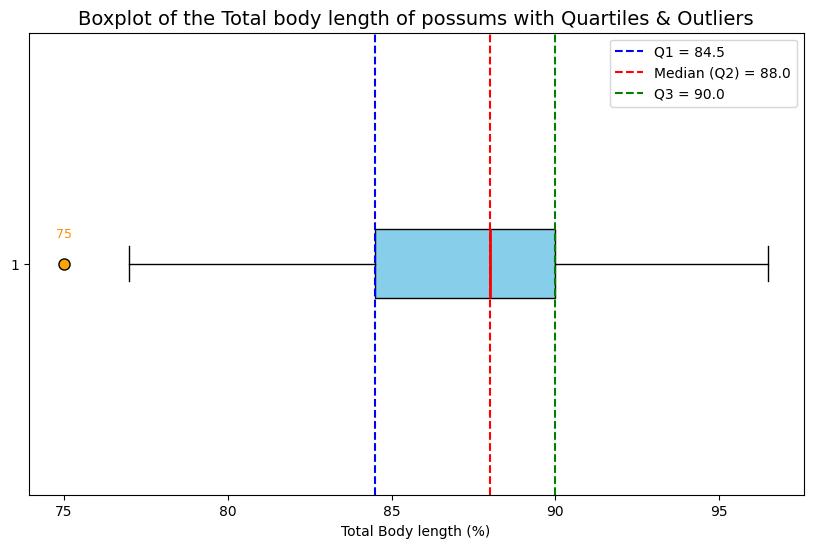

Q1 (25th percentile): 84.50
Q2 (Median, 50th percentile): 88.00
Q3 (75th percentile): 90.00
IQR (Q3 - Q1): 5.50
Lower Bound for Outliers: 76.25
Upper Bound for Outliers: 98.25
Outliers Detected: [np.float64(75.0)]


In [166]:
plt.figure(figsize=(10, 6))
box = plt.boxplot(total_body_length, vert=False, patch_artist=True,
                  boxprops=dict(facecolor="skyblue", color="black"),
                  medianprops=dict(color="red", linewidth=2),
                  whiskerprops=dict(color="black"),
                  capprops=dict(color="black"),
                  flierprops=dict(markerfacecolor="orange", marker='o', markersize=8, linestyle="none"))

# Annotate Quartiles
plt.axvline(q1, color="blue", linestyle="--", label=f"Q1 = {q1:.1f}")
plt.axvline(q2, color="red", linestyle="--", label=f"Median (Q2) = {q2:.1f}")
plt.axvline(q3, color="green", linestyle="--", label=f"Q3 = {q3:.1f}")

# Annotate outliers if present
for outlier in outliers:
    plt.text(outlier, 1.05, f"{outlier:.0f}", ha="center", va="bottom", color="darkorange", fontsize=9)

# Titles and labels
plt.title("Boxplot of the Total body length of possums with Quartiles & Outliers", fontsize=14)
plt.xlabel("Total Body length (%)")
plt.legend()

plt.show()

# Print results
print(f"Q1 (25th percentile): {q1:.2f}")
print(f"Q2 (Median, 50th percentile): {q2:.2f}")
print(f"Q3 (75th percentile): {q3:.2f}")
print(f"IQR (Q3 - Q1): {iqr:.2f}")
print(f"Lower Bound for Outliers: {lower_bound:.2f}")
print(f"Upper Bound for Outliers: {upper_bound:.2f}")
print(f"Outliers Detected: {list(outliers)}")

**Interpretation (detecting outliers)**
A value for the total body length was detected below the lower bound, indicating an outlier.